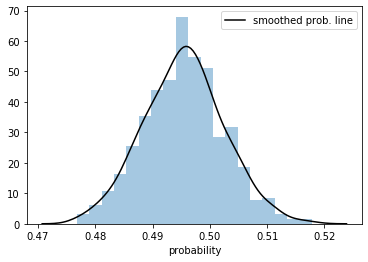

In [3]:
#%%
# generate a correlated graph with the help of 
# sample_edges function in graspy
import numpy as np
from graspy.simulations import sample_edges
from scipy.stats import bernoulli
import copy
import warnings
import seaborn as sns

%matplotlib inline
#%%
"""
for the simulation, we simply use the P matrix with all the same probability
but we can also define the P matrix by ourselves
for example: 
    if we have p matrix like this:
    p = [0.5,0.5,0.1,0.5,0.5,0.5,0.1,0.5,0.5]
    P = np.reshape(p,(3,3))
    we can get the reniewed P matrix like:
    [[0.35 0.35 0.07]
     [0.35 0.35 0.65]
     [0.07 0.65 0.35]]
     with the generated G2 like:
    [[0. 0. 0.]
     [0. 0. 1.]
     [0. 1. 0.]]
"""
p = 0.5
rho = 0.3
n = 100
P = p * np.ones( (n,n) )
Rho = rho * np.ones((n,n))
#%%

def sample_corr(P, Rho, directed=False, loops=False):
    G1 = sample_edges(P, directed = False, loops = False)
    origin_G1 = copy.deepcopy(G1)
    prob1 = origin_G1.sum()/n**2

    P1 = copy.deepcopy(P)
    Rho = copy.deepcopy(Rho)
    for i in range(n):
        for j in range(n):
            if G1[i][j] == 1:
                P1[i][j] = P[i][j]+Rho[i][j]*(1-P[i][j])
            else:
                P1[i][j] = P[i][j]*(1-Rho[i][j])
    prob2 = P1.sum()/n**2
    
    G2 = sample_edges(P1, directed = False, loops = False)
    G2 = G2 - np.diag(np.diag(G2))
    prob3 = G2.sum()/n**2
    return G2

p=[]
k=0
sum=0
for i in range (600):
    k = sample_corr(P, Rho, directed=False, loops=False)
    p.append(k)
p.sort()
#print(f'mean of prob',sum/10)
#print(p)
%matplotlib inline
sns.distplot(p,axlabel='probability', kde_kws={"label":"smoothed prob. line","color":"k"})

In [ ]:
"""
def similar_sample_corr(P, Rho, directed=False, loops=False):
    G1 = sample_edges(P, directed = False, loops = False)
    origin_G1 = copy.deepcopy(G1)
    prob1 = origin_G1.sum()/n**2

    P1 = copy.deepcopy(P)
    Rho = copy.deepcopy(Rho)
    P1[G1 == 1] = P+Rho*(1-P)
    P1[G1 == 0] = P[i][j]*(1-Rho[i][j])
    prob2 = P1.sum()/n**2
    
    G2 = sample_edges(P1, directed = False, loops = False)
    G2 = G2 - np.diag(np.diag(G2))
    prob3 = G2.sum()/n**2
    return G1, G2, P1, prob1, prob2, prob3

# seems like this way doesn't work 
# because we can not do things to the whole matrix 
# or each element of the matrix
# but if I define each element of P with a bernoullli distribution,
# it will be the one-time thing (if the original "1" position is 1,
# the elements on the original "1" position are 1)

g1, g2, p1, prob1, prob2, prob3 = similar_sample_corr(P, Rho, directed=False, loops=False)
#print(g2)
print(f'prob of 1 in G1 is',prob1)
print(f'prob of 1 in Pnew is',prob2)
print(f'prob of 1 in g2 is',prob3)
print(p1)
print(g1)
"""